In [1]:
# importing necessary libraries.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
# getting the data.
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
# getting the basic information about the columns and their data-type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
# checking for null values.
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [5]:
# checking for duplicates.
df.duplicated().value_counts()

False    4177
dtype: int64

In [6]:
# converting the object data-type column into numerical type using get_dummies method.
df= pd.get_dummies(df, drop_first=True)
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1,0


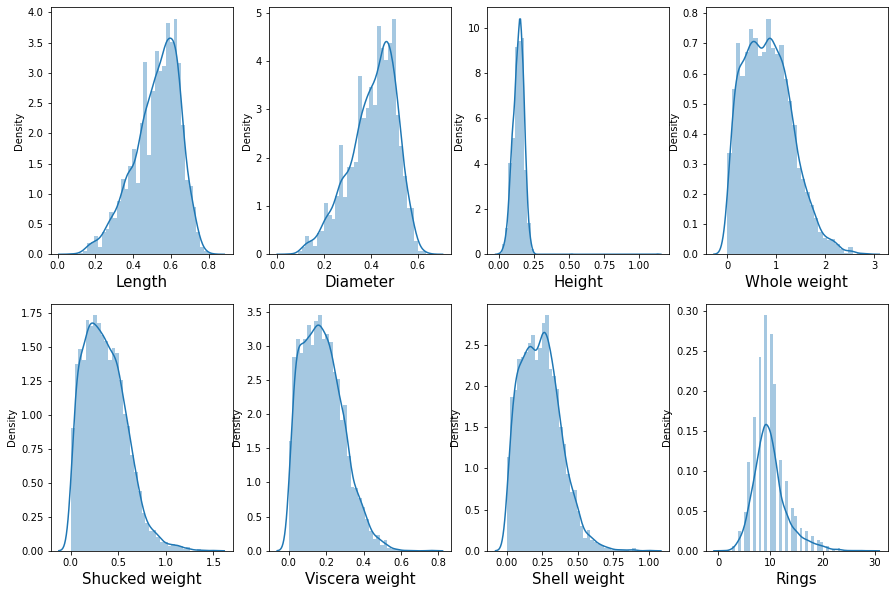

In [7]:
# Lets visualize the data distribution.
plt.figure(figsize=(15,10))
plotnumber=1
for column in df:
    if plotnumber<=8:
        ax= plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

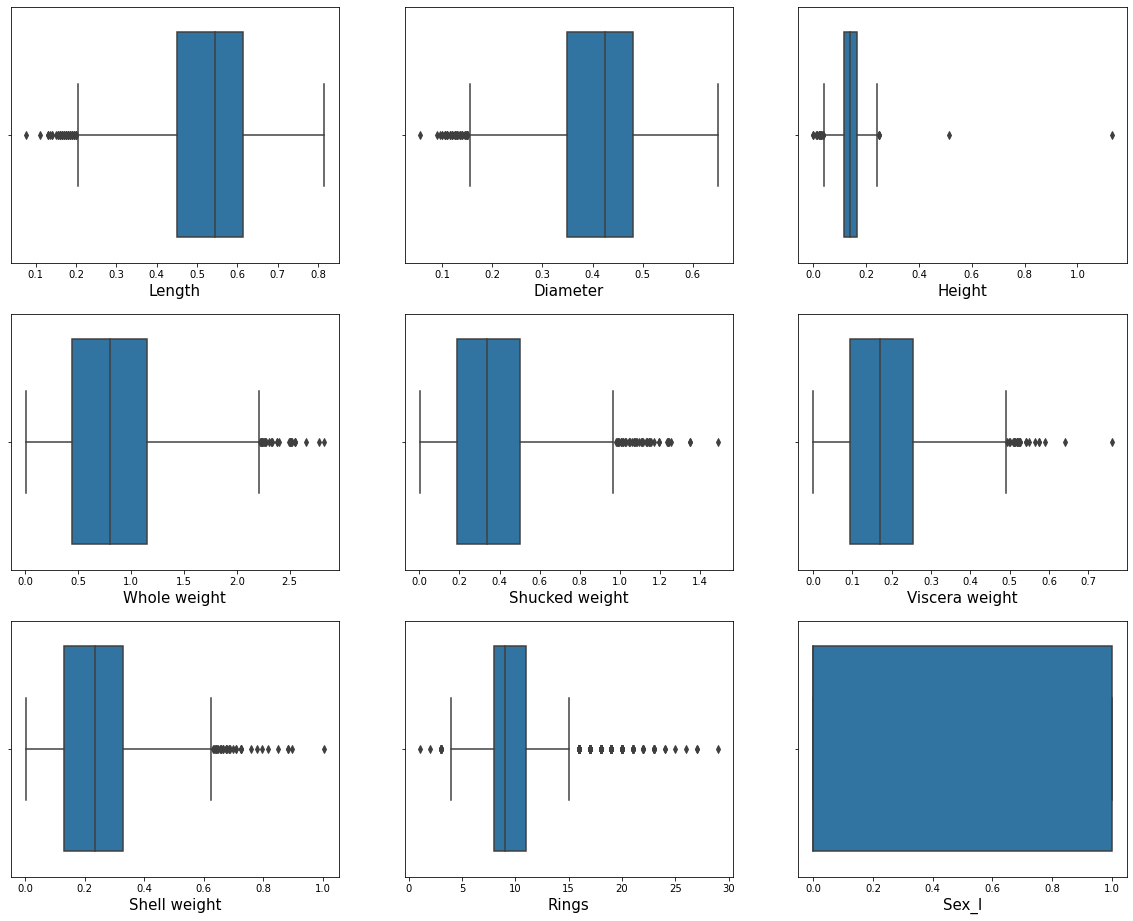

In [8]:
# checking the outliers using boxplot.
plt.figure(figsize=(20,16))
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax= plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000
Sex_I,4177.0,0.321283,0.467025,0.0000,0.0000,0.0000,1.000,1.0000
Sex_M,4177.0,0.365813,0.481715,0.0000,0.0000,0.0000,1.000,1.0000


In [10]:
# It can be seen that the data in many columns is skewed and there are lots of outliers.
# Lets remove the outliers first using iqr.

percentile25 = df['Length'].quantile(0.25)
percentile75 = df['Length'].quantile(0.75)
iqr= percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df = df[df['Length'] < upper_limit]
df = df[df['Length'] > lower_limit]

percentile25 = df['Diameter'].quantile(0.25)
percentile75 = df['Diameter'].quantile(0.75)
iqr= percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df = df[df['Diameter'] < upper_limit]
df = df[df['Diameter'] > lower_limit]

percentile25 = df['Height'].quantile(0.25)
percentile75 = df['Height'].quantile(0.75)
iqr= percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df = df[df['Height'] < upper_limit]
df = df[df['Height'] > lower_limit]

percentile25 = df['Whole weight'].quantile(0.25)
percentile75 = df['Whole weight'].quantile(0.75)
iqr= percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df = df[df['Whole weight'] < upper_limit]
df = df[df['Whole weight'] > lower_limit]

percentile25 = df['Shucked weight'].quantile(0.25)
percentile75 = df['Shucked weight'].quantile(0.75)
iqr= percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df = df[df['Shucked weight'] < upper_limit]
df = df[df['Shucked weight'] > lower_limit]

percentile25 = df['Viscera weight'].quantile(0.25)
percentile75 = df['Viscera weight'].quantile(0.75)
iqr= percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df = df[df['Viscera weight'] < upper_limit]
df = df[df['Viscera weight'] > lower_limit]

percentile25 = df['Shell weight'].quantile(0.25)
percentile75 = df['Shell weight'].quantile(0.75)
iqr= percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df = df[df['Shell weight'] < upper_limit]
df = df[df['Shell weight'] > lower_limit]

df.shape

(4012, 10)

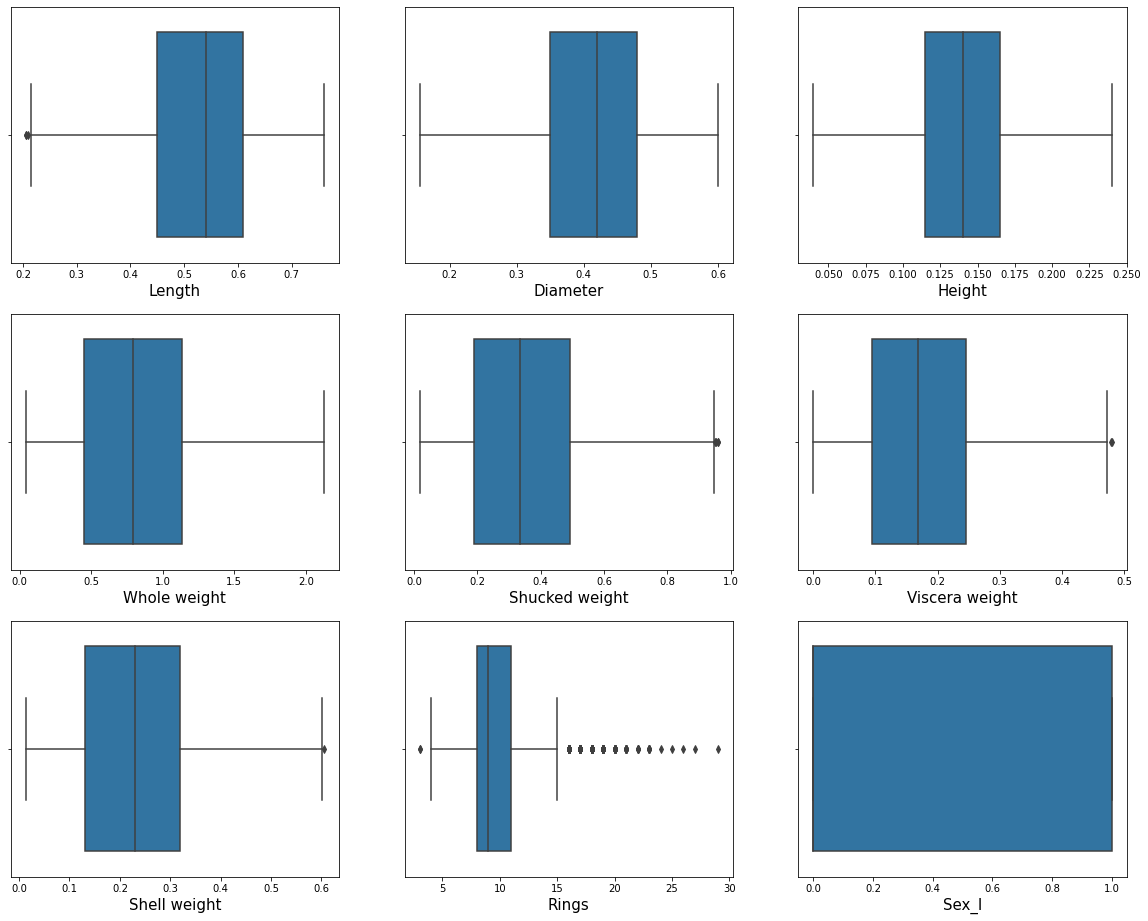

In [11]:
# Lets check the boxplot and data distribution now, after removal of outliers.

plt.figure(figsize=(20,16))
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax= plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [12]:
# checking the skewness in the data after removal of the outliers.
df.skew()

# It can be seen that all the continuous numerical feature columns have skewness within an acceptable range of (-0.65,0.65)

Length           -0.543453
Diameter         -0.522602
Height           -0.183692
Whole weight      0.292770
Shucked weight    0.427461
Viscera weight    0.395986
Shell weight      0.319690
Rings             1.211147
Sex_I             0.768155
Sex_M             0.562581
dtype: float64

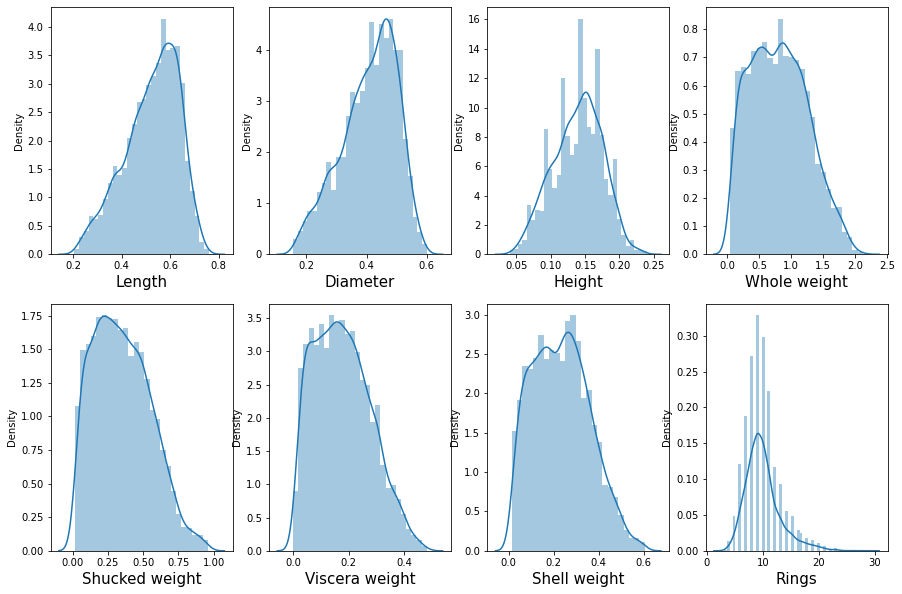

In [13]:
# Lets see how the distribution plot looks now.
plt.figure(figsize=(15,10))
plotnumber=1
for column in df:
    if plotnumber<=8:
        ax= plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

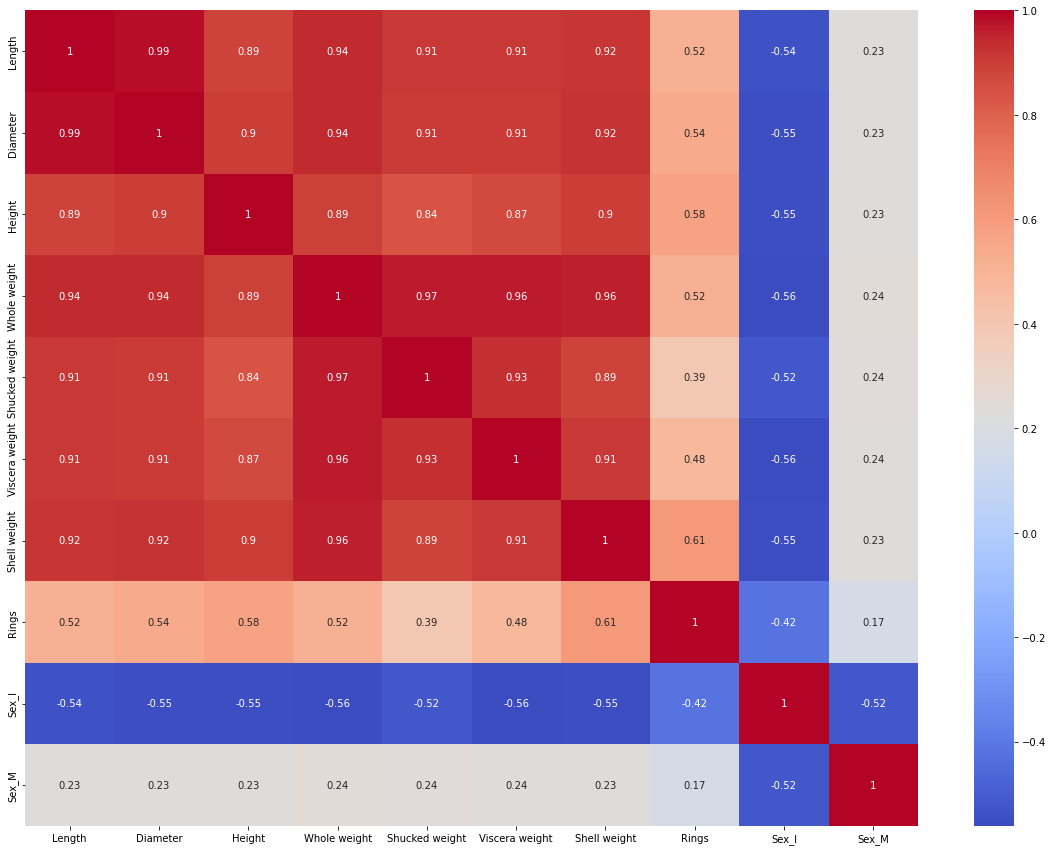

In [14]:
# Lets see the correlation heat-map.
corr= df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot= True, cmap="coolwarm")
plt.show()

In [15]:
df.corr().T

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_I,Sex_M
Length,1.000000,0.985514,0.889708,0.940061,0.913446,0.912731,0.915737,0.516710,-0.540289,0.228397
Diameter,0.985514,1.000000,0.896375,0.939133,0.906962,0.907980,0.923381,0.537429,-0.554180,0.232711
Height,0.889708,0.896375,1.000000,0.891394,0.837495,0.867712,0.898180,0.578464,-0.549135,0.227771
Whole weight,0.940061,0.939133,0.891394,1.000000,0.968234,0.964789,0.958020,0.515669,-0.561030,0.244744
Shucked weight,0.913446,0.906962,0.837495,0.968234,1.000000,0.926981,0.886720,0.391631,-0.523532,0.241967
Viscera weight,0.912731,0.907980,0.867712,0.964789,0.926981,1.000000,0.912551,0.479153,-0.557564,0.235793
Shell weight,0.915737,0.923381,0.898180,0.958020,0.886720,0.912551,1.000000,0.605342,-0.552736,0.232983
Rings,0.516710,0.537429,0.578464,0.515669,0.391631,0.479153,0.605342,1.000000,-0.418426,0.174034
Sex_I,-0.540289,-0.554180,-0.549135,-0.561030,-0.523532,-0.557564,-0.552736,-0.418426,1.000000,-0.520647
Sex_M,0.228397,0.232711,0.227771,0.244744,0.241967,0.235793,0.232983,0.174034,-0.520647,1.000000


In [16]:
# Lets check the correlation of our columns with the target variable.
correlation= df.corr()
np.abs(correlation["Rings"])

# No column seems to be having a very weak relation with our target column.

Length            0.516710
Diameter          0.537429
Height            0.578464
Whole weight      0.515669
Shucked weight    0.391631
Viscera weight    0.479153
Shell weight      0.605342
Rings             1.000000
Sex_I             0.418426
Sex_M             0.174034
Name: Rings, dtype: float64

In [17]:
# Observations:
# From the above correlation heat-map and matrix it can be seen that a large number of features have multicollinearity problem.
# In such a scenario I think the best way to proceed is to apply Principal Component Analysis.

In [18]:
# Separating the features and label.
X= df.drop(columns=["Rings"])
y= df["Rings"]

In [19]:
# scaling the data using standard scaler.
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

In [20]:
# # checking the variance-inflation-factor among our features.

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]= X.columns
print(vif)

# Very high multicollinearity can be seen.

         vif        Features
0  38.488687          Length
1  39.586484        Diameter
2   6.328236          Height
3  99.791235    Whole weight
4  26.351476  Shucked weight
5  16.265456  Viscera weight
6  22.061516    Shell weight
7   1.971890           Sex_I
8   1.390531           Sex_M


In [21]:
# Applying Principal Component Analysis on our features as it takes care of the multicollinearity problem.

from sklearn.decomposition import PCA
pca= PCA()
pca.fit_transform(X_scaled)

array([[-1.49770982e+00,  1.88204793e+00,  2.42377653e-02, ...,
        -2.93611834e-02, -1.05168872e-01, -1.87959832e-02],
       [-3.18171767e+00,  2.30969127e+00,  2.97691535e-01, ...,
        -6.26268013e-02,  4.37093060e-03,  8.99542205e-03],
       [-3.73256119e-01, -1.50524879e-01,  1.07126942e+00, ...,
         3.75788207e-02, -3.07136791e-02, -4.49295260e-02],
       ...,
       [ 2.73522481e+00,  8.60183590e-01, -4.47941571e-01, ...,
         1.54925090e-01, -4.31870840e-02,  2.07313913e-02],
       [ 1.87191576e+00, -7.08858334e-01,  6.79715330e-01, ...,
         8.82846624e-02,  2.92525351e-02,  1.05700739e-01],
       [ 5.58249902e+00,  1.41802705e-01, -1.03746044e+00, ...,
        -6.22784580e-01,  2.90487407e-02, -4.78120346e-02]])

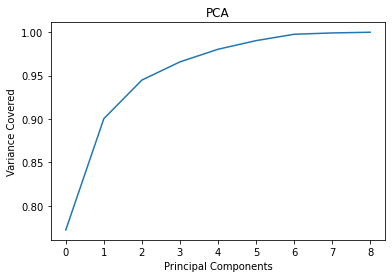

In [22]:
# Lets plot the scree-plot to check the best components.

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principal Components")
plt.ylabel("Variance Covered")
plt.title("PCA")
plt.show()

In [23]:
# Lets take 7 principal components and build the corresponding dataframe.
pca= PCA(n_components=7)
new_pcomp= pca.fit_transform(X_scaled)

p_comps= pd.DataFrame(new_pcomp,columns=["PC1","PC2","PC3","PC4","PC5","PC6","PC7"])

In [24]:
############################################## LOGISTIC REGRESSION #############################################################

from sklearn.linear_model import LogisticRegression
for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(p_comps,y,test_size=0.25,random_state=i)

    lr= LogisticRegression()
    lr.fit(x_train, y_train)

    y_pred_train = lr.predict(x_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= lr.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2)) 
    print("\n")

Training Score for sample 0 : 28.18
Testing Score for sample 0 : 27.12


Training Score for sample 1 : 28.12
Testing Score for sample 1 : 26.42


Training Score for sample 2 : 28.28
Testing Score for sample 2 : 25.82


Training Score for sample 3 : 28.71
Testing Score for sample 3 : 26.72


Training Score for sample 4 : 28.38
Testing Score for sample 4 : 27.42


Training Score for sample 5 : 28.18
Testing Score for sample 5 : 26.02


Training Score for sample 6 : 29.48
Testing Score for sample 6 : 25.92


Training Score for sample 7 : 27.55
Testing Score for sample 7 : 27.72


Training Score for sample 8 : 28.78
Testing Score for sample 8 : 26.02


Training Score for sample 9 : 29.11
Testing Score for sample 9 : 27.62




In [25]:
############################################## RANDOM FOREST CLASSIFIER ########################################################

from sklearn.ensemble import RandomForestClassifier
for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(p_comps,y,test_size=0.25,random_state=i)

    clf= RandomForestClassifier()
    clf.fit(x_train, y_train)

    y_pred_train = clf.predict(x_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= clf.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))
    print("\n")
    

Training Score for sample 0 : 100.0
Testing Score for sample 0 : 23.33


Training Score for sample 1 : 100.0
Testing Score for sample 1 : 23.63


Training Score for sample 2 : 100.0
Testing Score for sample 2 : 22.13


Training Score for sample 3 : 100.0
Testing Score for sample 3 : 22.23


Training Score for sample 4 : 100.0
Testing Score for sample 4 : 24.73


Training Score for sample 5 : 100.0
Testing Score for sample 5 : 23.13


Training Score for sample 6 : 100.0
Testing Score for sample 6 : 22.43


Training Score for sample 7 : 100.0
Testing Score for sample 7 : 22.63


Training Score for sample 8 : 100.0
Testing Score for sample 8 : 23.13


Training Score for sample 9 : 100.0
Testing Score for sample 9 : 23.33




In [26]:
############################################## SUPPORT VECTOR MACHINE ##########################################################

from sklearn.svm import SVC
for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(p_comps,y,test_size=0.25,random_state=i)
    
    svc= SVC()
    svc.fit(x_train, y_train)

    y_pred_train = svc.predict(x_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= svc.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2)) 
    print("\n")

Training Score for sample 0 : 28.71
Testing Score for sample 0 : 27.22


Training Score for sample 1 : 29.08
Testing Score for sample 1 : 26.32


Training Score for sample 2 : 30.11
Testing Score for sample 2 : 25.82


Training Score for sample 3 : 29.15
Testing Score for sample 3 : 26.62


Training Score for sample 4 : 28.58
Testing Score for sample 4 : 28.81


Training Score for sample 5 : 28.95
Testing Score for sample 5 : 27.72


Training Score for sample 6 : 29.81
Testing Score for sample 6 : 23.43


Training Score for sample 7 : 29.31
Testing Score for sample 7 : 26.72


Training Score for sample 8 : 29.28
Testing Score for sample 8 : 26.92


Training Score for sample 9 : 28.95
Testing Score for sample 9 : 26.72




In [27]:
################################################## KNN CLASSIFIER ##############################################################

from sklearn.neighbors import KNeighborsClassifier
for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(p_comps,y,test_size=0.25,random_state=i)
    
    knn= KNeighborsClassifier()
    knn.fit(x_train, y_train)

    y_pred_train = knn.predict(x_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= knn.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))
    print("\n")

Training Score for sample 0 : 42.74
Testing Score for sample 0 : 21.83


Training Score for sample 1 : 44.4
Testing Score for sample 1 : 22.93


Training Score for sample 2 : 44.33
Testing Score for sample 2 : 22.63


Training Score for sample 3 : 44.23
Testing Score for sample 3 : 20.34


Training Score for sample 4 : 43.24
Testing Score for sample 4 : 22.93


Training Score for sample 5 : 44.23
Testing Score for sample 5 : 18.64


Training Score for sample 6 : 43.5
Testing Score for sample 6 : 19.94


Training Score for sample 7 : 43.14
Testing Score for sample 7 : 21.83


Training Score for sample 8 : 43.87
Testing Score for sample 8 : 20.74


Training Score for sample 9 : 43.54
Testing Score for sample 9 : 20.64




In [36]:
# It can be seen that the Logistic Regression and SVM are giving better results when we compare the training and testing results.
# Random Forests model seems to be overfitting as there is huge difference between training and testing score.
# Lets move ahead with Logistic Regression.

In [28]:
#Hyperparameter tuning using GridSearchCV.

from sklearn.model_selection import GridSearchCV
params= {"penalty": ['l1','l2','elasticnet'],
         "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
         "max_iter": [500,1000,2000,5000]}

grd= GridSearchCV(lr, param_grid=params,cv=5)

grd.fit(x_train,y_train)
print(grd.best_params_)

{'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}


In [34]:
# Taking the best sample split result and applying on the tuned model.

x_train,x_test,y_train,y_test = train_test_split(p_comps,y,test_size=0.25,random_state=7)

lr_grd =grd.best_estimator_
lr_grd.fit(x_train, y_train)
    
y_pred_train = lr_grd.predict(x_train)
accuracy_train = accuracy_score(y_train,y_pred_train)
print("Training Score:",round(accuracy_train*100,2))

y_pred= lr_grd.predict(x_test)
accuracy_test = accuracy_score(y_test,y_pred)
print("Testing Score:",round(accuracy_test*100,2)) 


Training Score: 27.48
Testing Score: 28.51


In [35]:
# Classification Report

print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.45      0.45      0.45        22
           6       0.36      0.28      0.32        57
           7       0.37      0.43      0.40        93
           8       0.31      0.47      0.37       129
           9       0.32      0.35      0.33       195
          10       0.22      0.37      0.27       159
          11       0.28      0.20      0.23       115
          12       0.00      0.00      0.00        54
          13       0.23      0.21      0.22        43
          14       0.00      0.00      0.00        35
          15       0.00      0.00      0.00        33
          16       0.00      0.00      0.00         9
          17       0.00      0.00      0.00        21
          18       0.00      0.00      0.00        11
          19       0.00      0.00      0.00        12
          20       0.00      0.00      0.00         4
          21       0.00    

In [32]:
# cross-validating the Logistic Regression model.
from sklearn.model_selection import cross_val_score, KFold

for i in range(5,10):
    cv_score= cross_val_score(lr_grd,p_comps,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 27.12
the cv score for 6 fold: 26.67
the cv score for 7 fold: 26.85
the cv score for 8 fold: 26.55
the cv score for 9 fold: 26.9


In [33]:
# saving the model using pickle
import pickle

Abalone_Case= "Abalone_final_model.pickle"
pickle.dump(lr_grd, open(Abalone_Case,'wb'))